<a href="https://colab.research.google.com/github/MahfuzaRU/Artificial-Intelligence/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

question :
"building a CNN based 10 class classifier
training and testing the classifier by using MNIST dataset"



In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
# Load MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
#  Preprocess the Data
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Build CNN Model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

In [ ]:
# Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
# Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.9606 - loss: 0.1330 - val_accuracy: 0.9862 - val_loss: 0.0445
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.9780 - loss: 0.0744 - val_accuracy: 0.9910 - val_loss: 0.0373
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9827 - loss: 0.0559 - val_accuracy: 0.9912 - val_loss: 0.0341
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9860 - loss: 0.0453 - val_accuracy: 0.9910 - val_loss: 0.0338
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9896 - loss: 0.0346 - val_accuracy: 0.9917 - val_loss: 0.0315


In [ ]:
# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9901


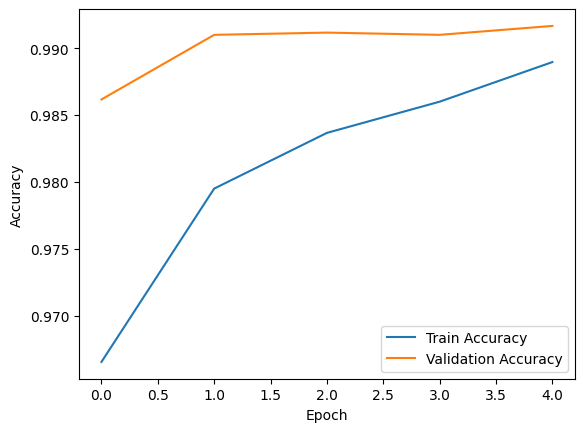

In [ ]:
#  Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


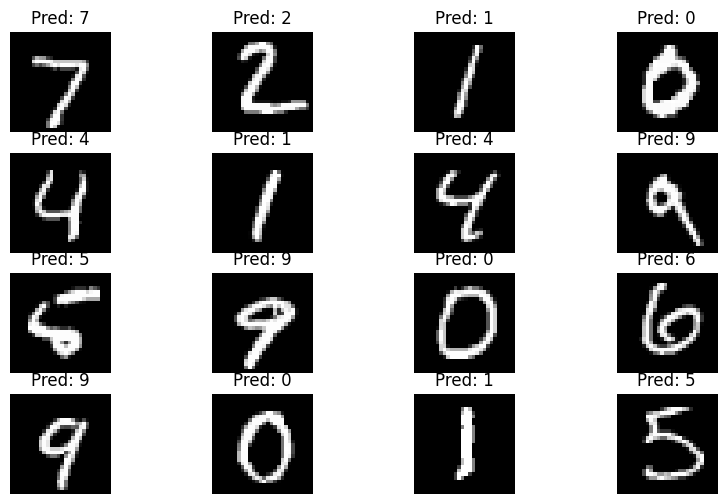

In [ ]:
import numpy as np
predictions = model.predict(X_test[:16])

plt.figure(figsize=(10,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.savefig("check_img.png")

plt.show()

In [ ]:
from google.colab import files
files.download("check_img.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>